In [1]:
import pandas as pd 
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt 

<ipython-input-2-25a8c6fad0ea>:23: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(np.log10(percentage),cmap = "inferno")


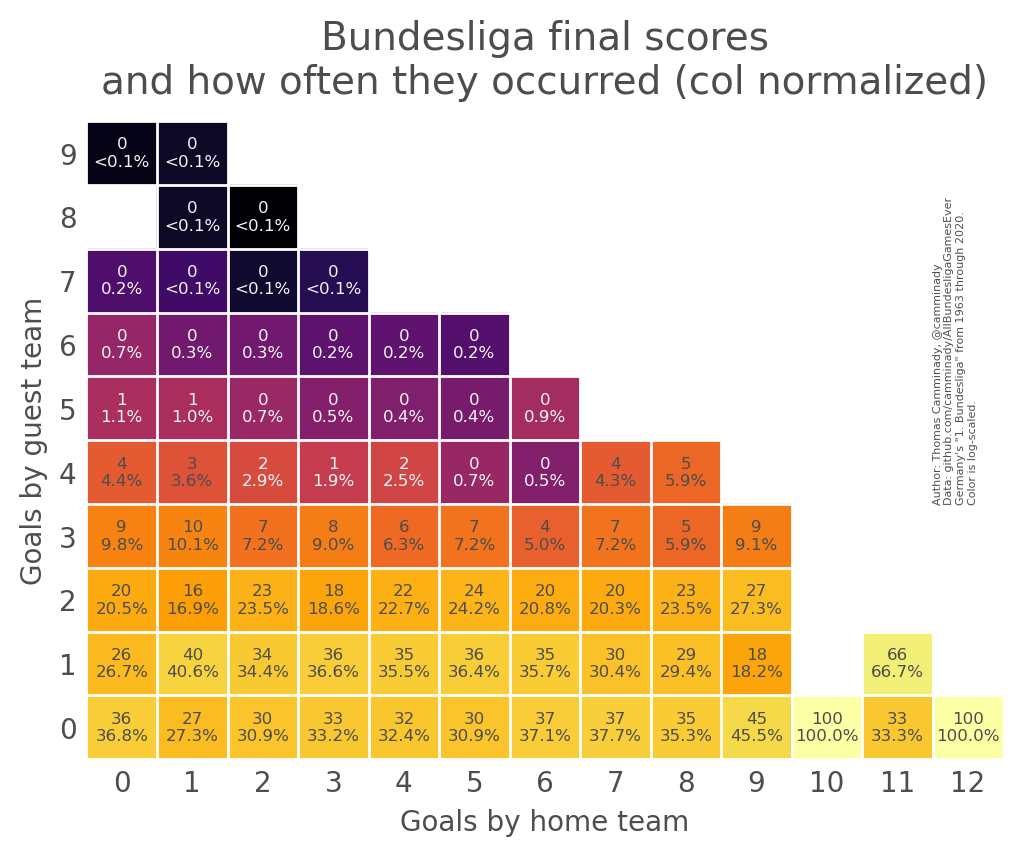

In [2]:
df = pd.read_csv("AllBundesligaGamesEver.csv",sep=";")
df = df[df["League"] == "1. Bundesliga"]
unique, frequency = np.unique(df.Score90.values,  
                              return_counts = True) 
n = 13
#unique = unique[:-1]
count = np.zeros((n,n))
for r,c in zip(unique,frequency):
    j = int(r.split(":")[0])
    i = int(r.split(":")[1])
    count[i,j] = c
    
plt.style.use("kitishnotex")
fig, ax = plt.subplots(figsize =(5,5*10/12),constrained_layout=True,facecolor = "w")


#for i in range(count.shape[0]):
#  count[:,i] *= 100/np.sum(count[:,i])
  
percentage =count/np.sum(count)*100
dark = (0.3,0.3,0.3)

plt.pcolormesh(np.log10(percentage),cmap = "inferno")
ax.set_xticks(0.5+np.arange(n))
ax.set_xticklabels(np.arange(n), color = dark)
ax.set_xlim([0,13])
ax.set_yticks(0.5+np.arange(n))
ax.set_yticklabels(np.arange(n), color = dark)
ax.set_ylim([0,10])
ax.set_xlabel("Goals by home team",color = dark)
ax.set_ylabel("Goals by guest team",color = dark)

for i in range(n):
    for j in range(n):
        c = np.round(percentage[i,j],1)
        if percentage[i,j]>0:
            if c < 3:
                col = "whitesmoke"
            else:
                col = dark
            if c<=0.1:
                ax.text(j+0.5,i+0.5,str(int(count[i,j]))+"\n"+"<0.1%",va = "center",ha="center",
                   fontsize = 6,color = col)
            
            else:
                ax.text(j+0.5,i+0.5,str(int(count[i,j]))+"\n"+str(c)+"%",va = "center",ha="center",
                   fontsize = 6,color = col)
            
for i in range(n):
    ax.axvline(i,c="w",lw = 1)
    ax.axhline(i,c="w",lw = 1)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_title("Bundesliga final scores\nand how often they occurred",color = dark,fontsize = 14)
ax.text(12,4,"""Author: Thomas Camminady, @camminady\nData: github.com/camminady/AllBundesligaGamesEver\nGermany's "1. Bundesliga" from 1963 through 2020.\nColor is log-scaled.""",rotation = 90,va="bottom",fontsize = 4,color=dark)
plt.savefig("ScoreboardPercentage.png",dpi=400)